In [1]:
#!pip install capymoa

In [2]:
!java -version # capyMOA also needs java


openjdk version "11.0.28" 2025-07-15
OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)


In [5]:
# this example implements test then train approach by hand
import capymoa
from capymoa.stream.generator import SEA
from capymoa.classifier import HoeffdingTree
from capymoa.evaluation import ClassificationEvaluator

# Stream
stream = SEA(instance_random_seed=42)

# Learner
learner = HoeffdingTree(schema=stream.get_schema(), grace_period=50)

# Evaluator
evaluator = ClassificationEvaluator(schema=stream.get_schema())

# Process only N instances
# Originally, SEA stream produces infinite data so we define a n instance limit
N = 5000
for i, instance in zip(range(N), stream):
    prediction = learner.predict(instance)
    learner.train(instance)
    evaluator.update(instance.y_index, prediction)

print("Final accuracy after", N, "instances:", evaluator.accuracy())


Final accuracy after 5000 instances: 85.8


In [6]:
# we can use prerequential evaluation function rather than implementing test then train approach by hand
from capymoa.evaluation import prequential_evaluation
from capymoa.classifier import HoeffdingTree

ht = HoeffdingTree(schema=stream.get_schema(), grace_period=50)

results_ht = prequential_evaluation(
    stream=stream,
    learner=ht,
    window_size=200,
    max_instances=5000  # limit number of examples to process
)

print(
    f"Cumulative accuracy = {results_ht.cumulative.accuracy()}, wall-clock time: {results_ht.wallclock()}"
)

# The windowed results are conveniently stored in a pandas DataFrame.
display(results_ht.windowed.metrics_per_window())

Cumulative accuracy = 85.8, wall-clock time: 0.30157923698425293


,instances,accuracy,kappa,kappa_t,kappa_m,f1_score,f1_score_0,f1_score_1,precision,precision_0,precision_1,recall,recall_0,recall_1
0,200.0,81.5,55.314010,57.471264,31.481481,77.676076,68.376068,86.925795,77.261905,66.666667,87.857143,78.094712,70.175439,86.013986
1,400.0,87.0,71.191136,73.195876,65.333333,86.039112,80.882353,90.151515,87.887723,90.163934,85.611511,84.266667,73.333333,95.200000
2,600.0,87.5,69.951923,71.910112,61.538462,85.423903,78.632479,91.166078,87.811850,88.461538,87.162162,83.162393,70.769231,95.555556
3,800.0,85.0,65.564738,63.855422,58.333333,83.525457,76.190476,89.051095,86.225266,88.888889,83.561644,80.989583,66.666667,95.312500
4,1000.0,86.0,67.860422,71.717172,61.111111,84.697566,77.777778,89.781022,87.493658,90.740741,84.246575,82.074653,68.055556,96.093750
5,1200.0,88.0,71.777987,69.230769,63.636364,86.145925,80.327869,91.366906,87.847222,87.500000,88.194444,84.509272,74.242424,94.776119
6,1400.0,86.5,66.080402,64.935065,55.000000,83.373668,75.229358,90.721649,85.545344,83.673469,87.417219,81.309524,68.333333,94.285714
7,1600.0,84.5,66.471988,67.021277,56.338028,83.253769,78.620690,87.843137,82.957958,77.027027,88.888889,83.551698,80.281690,86.821705
8,1800.0,79.5,47.969543,45.333333,31.666667,74.343337,61.682243,86.006826,76.282854,70.212766,82.352941,72.500000,55.000000,90.000000
9,2000.0,87.0,71.191136,72.916667,65.333333,86.039112,80.882353,90.151515,87.887723,90.163934,85.611511,84.266667,73.333333,95.200000


HT final accuracy = 85.800
AHT final accuracy = 85.680
NB final accuracy = 86.640
KNN final accuracy = 86.500


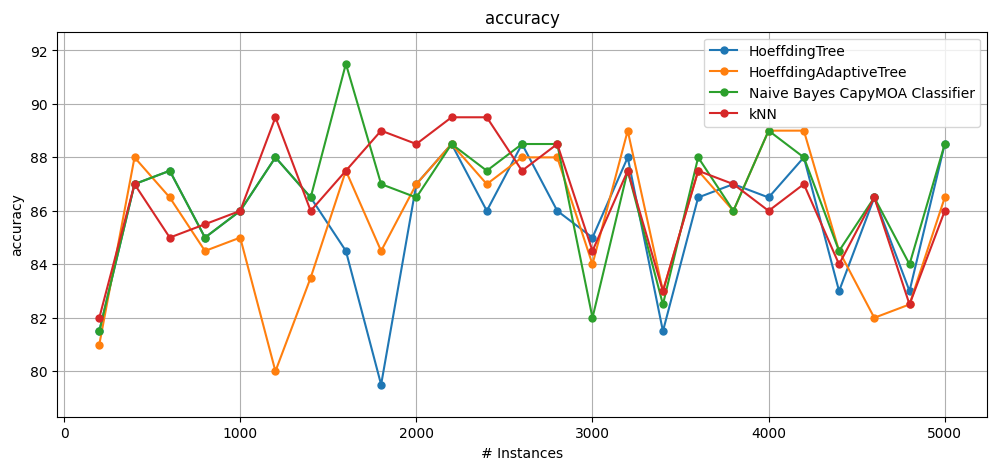

In [16]:
from capymoa.classifier import (
    HoeffdingTree,
    HoeffdingAdaptiveTree,
    NaiveBayes,
    KNN
)
from capymoa.evaluation import prequential_evaluation_multiple_learners
from capymoa.evaluation.visualization import plot_windowed_results

import matplotlib.pyplot as plt


learners = {
    "HT": HoeffdingTree(schema=stream.schema, grace_period=50),
    "AHT": HoeffdingAdaptiveTree(schema=stream.schema, grace_period=50),
    "NB": NaiveBayes(schema=stream.schema),
    "KNN": KNN(schema=stream.schema, k=5)
}

# 3. Prequential evaluation
results = prequential_evaluation_multiple_learners(
    stream,
    learners,
    window_size=200,
    max_instances=N
)

# 4. Print cumulative accuracies
for name in learners.keys():
    print(f"{name} final accuracy = {results[name].cumulative.accuracy():.3f}")

# 5. Plot windowed accuracies
plot_windowed_results(*[results[name] for name in learners.keys()], metric="accuracy")
plt.show()

